## PCA

PCA es un algoritmo clásico de reducción de dimensionalidad que se basa en **encontrar la mejor transformacion lineal a un subespacio de menor dimensionalidad**. Vamos a ver cómo usar la implementación de este algoritmo en Scikit Learn. Para este ejemplo vamos a tomar el _dataset_ de las flores Iris. Vamos a tomar las cuatro columnas (largo y ancho del pétalo y sépalo) y vamos a generar una representación en dos dimensiones.

In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd

iris = load_iris(as_frame=True)

# El dataset original tiene 4 features
X = iris['data']
y = iris['target']

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Ahora vamos a reducir la dimensionalidad. Para esto vamos a usar la clase `PCA` que ya importamos. Le vamos a pedir que transforme este _dataset_ a uno de dos dimensiones.

In [2]:
# Ahora vamos a reducir la dimensionalidad

# Queremos reducir a dos dimensiones
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])
X_2D

,dimension 1,dimension 2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


Lo que hicimos fue pasar de un _dataset_ de 4 dimensiones a uno de 2 dimensiones. 

### Importante

Un error habitual es pensar que las nuevas columnas vienen del _dataset_ de altas dimensiones, por lo que es importante recalcar que las nuevas columnas **no están tomadas del _dataset_ en 4 dimensiones**. Aquí estamos generando nuevas dimensiones en base a las proyecciones de los puntos en el hiperplano en bajas dimensiones.


### Estandarización de las columnas

Algo muy importante a la hora de usar PCA es que las columnas deben estar estandarizadas. Esto mejora bastante el rendimiento del algoritmo cuando las columnas tienen distintos órdenes de magnitud. Vamos a ver cómo hacer esto con Scikit Learn.

In [3]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [4]:
# Ahora vamos a reducir la dimensión del dataset estandarizado

# Queremos reducir a dos dimensiones
pca = PCA(n_components=2)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_2D = pca.fit_transform(X_std)
X_2D = pd.DataFrame(X_2D, columns=["dimension 1", "dimension 2"])
X_2D

,dimension 1,dimension 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


### Varianza de cada componente

Como discutimos en clases, podemos ver el porcentaje de varianza guardado por cada componente. Esta es una forma de medir cuanta información del _dataset_ original guarda la transformación.

In [5]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Podemos graficar esto con un Barplot.

<BarContainer object of 2 artists>

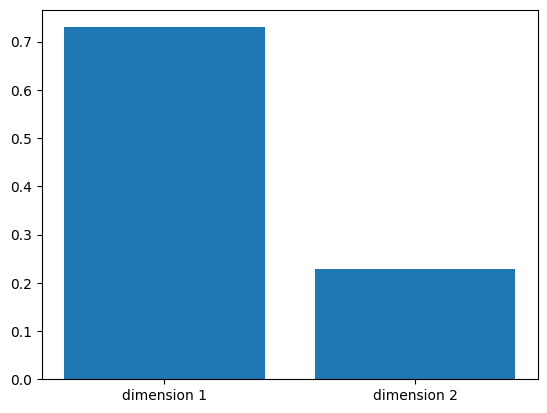

In [6]:
import matplotlib.pyplot as plt

plt.bar(X_2D.columns, pca.explained_variance_ratio_)

Así, la primera componente "guarda" un 72% de la varianza total, y la segunda componente guarda 22%. Veamos que pasa al hacer reducción de dimensionalidad de 3 dimensiones.

In [7]:
# Queremos reducir a tres dimensiones
pca = PCA(n_components=3)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_3D = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

Como vemos, la tercera componente guarda 3% de la varianza del _dataset_ original. ¿Cómo podemos escoger el número de componentes sobre cierto _threshold_? Se le puede indicar al constructor de la clase `PCA`. En este caso, le vamos a pedir un número de componentes suficiente para tener el 95% de la varianza del _dataset_.

In [8]:
# Queremos reducir a las dimensiones suficientes para preservar un 95% de la varianza al menos
pca = PCA(n_components=0.95)

# Guardamos el dataset pero ahora en su versión reducida en 2 dimensiones
X_PCA = pca.fit_transform(X_std)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

### Importante

Recordemos que lo que hace PCA es aprender una representación en bajas dimensiones de los datos. Así, imaginemos que vamos de paseo y encontramos una flor Iris. Si queremos reducir la dimensión de esa flor **no vamos a entrenar el algoritmo de nuevo**, sino que vamos a usar la representación aprendida para transformar este nuevo dato.

In [9]:
nueva_flor = [1, 2, 3, 4]

# Primero estandarizamos con el mismo estandarizador que usamos anteriormente
nueva_flor_std = std_scaler.transform([nueva_flor])

nueva_flor_2D = pca.transform(nueva_flor_std)

# Esta es la representación de la flor en dos dimensiones
nueva_flor_2D

/Users/juan/downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.57000112, -4.22591697]])

## Ejercicio 1

Vuelve a hacer PCA sobre el dataset MNIST de la tarea. Cuántas dimensiones necesitas para explicar el 95% de la varianza? 

In [7]:
import functools
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, accuracy_score


import warnings
warnings.simplefilter("ignore", category=UserWarning)

In [2]:
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
pca = PCA(n_components=0.95)

X, y = mnist['data'], mnist['target']
X_sample = X[60000:]
y_sample = y[60000:]

X_PCA = pca.fit_transform(X_sample)
X_PCA

array([[-4.11260996e+02, -6.86561610e+02,  5.11129462e+01, ...,
        -1.21240492e+00, -3.85548165e+01,  3.21427922e+01],
       [ 5.80659352e+01,  9.83170260e+02, -8.88468962e+00, ...,
        -3.81147275e+00, -2.46683767e+01, -3.62369912e+01],
       [-9.35105339e+02,  4.59074661e+02, -3.19994509e+02, ...,
         8.50166222e+00,  7.18771952e+00, -5.53546003e+00],
       ...,
       [-2.82415573e+02, -5.50853516e+02, -1.97570885e+02, ...,
         4.98683655e-01, -3.88071849e+01, -7.79244250e+00],
       [-2.87270866e+02,  1.55851849e+02, -5.36987521e+02, ...,
         8.93397285e+01, -2.96590351e+00,  1.21236984e+01],
       [ 1.14417000e+03,  2.27198893e+01, -8.49488971e+02, ...,
         5.26974428e+01,  6.98894908e+01,  2.13865520e+01]])

In [5]:
explained_variance_ratio = pca.explained_variance_ratio_

# Determine the number of pca_dim
acumulado = np.cumsum(explained_variance_ratio)
dimensiones = np.argmax(acumulado >= 0.95) + 1

print(f"Se necesitan {dimensiones} dimensiones para explicar 95% de la varianza")

Se necesitan 149 dimensiones para explicar 95% de la varianza


## Ejercicio 2

Ahora grafica número de dimensiones finales después del PCA v/s varianza explicada, para aumentos de a 5, partiendo desde 2: $X = 2, 7, 12, 17, 22$ (la varianza que explica el PCA es la suma de las varianzas que explican cada una de las dimensiones). ¿Podemos usar una especie de método del codo para elegir cuál es un número óptimo de dimensiones con las que nos quedamos luego de usar PCA? ¿O es más bien estable la forma en que cada dimensión nueva va aportando menos varianza?

In [19]:
explained_variance_ratio = pca.explained_variance_ratio_

# Create a plot of the number of pca_dim vs. explained variance
pca_dim = np.arange(2, len(explained_variance_ratio) + 1, 5)

varianza_explicada = np.cumsum(explained_variance_ratio)[pca_dim - 1]

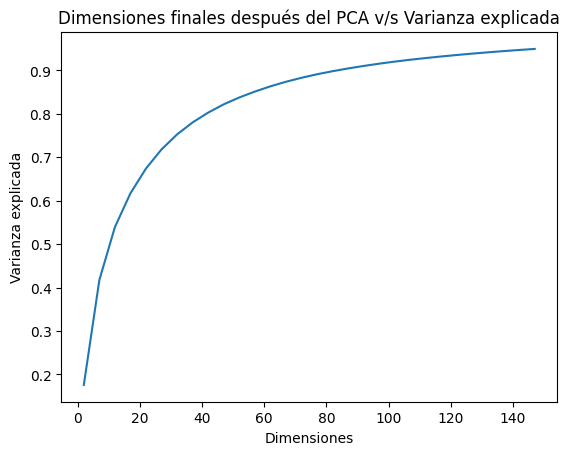

In [20]:
plt.plot(pca_dim, varianza_explicada)
plt.xlabel('Dimensiones')
plt.ylabel('Varianza explicada')
plt.title('Dimensiones finales después del PCA v/s Varianza explicada')
plt.show()

Vemos que es exponencial, mientras más dimensiones, hay una mayor varianza.